# Classification I: Generative models

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2F05_classification_generative.ipynb)

<div class="alert alert-block alert-warning">
    <b>Prerequisites</b>
    
- Bayes Theorem

</div>

<div class="alert alert-block alert-info">
    <b>Learning Outcomes</b>
    
- Bayes decision boundary
- Linear discriminant analysis
- Naive Bayses classifier
    
</div>

## Introduction

Weather, clouds, seasons, wind, hurricane... Categories and classifications are everywhere in environmental sciences. They can be artificially created based on thresholds (as in the hurricane example below) or they can correspond to truly **discrete variable** (e.g. "It's raining, it's not raining").


<img alt="saphir" src="images/saphir_scale.png" width=400 style="float:center">

To use proper terminology, we say that categorical variables are **qualitative** (can be described with words) whereas variables that reflect a notion of magnitude are **quantitative** (can be measured).

In the example above, you can describe with words what a hurricane of category 3 is. However, you cannot describe what a wind of 100 km/h is.

### Weather icons

We have already derived methods to predict quantitative variables (variables that vary continuously). In many problems however, the variable we are trying to predict is qualitative (takes discrete values). It is actually often the case that a complex meteorological situation is summarized by a pictogram or by a warning (Cat 5. hurricane, storm warning, etc.). These categorical variable help establishing an appropriate response plan based on the forecast. To illustrate the transition between quantitative and qualitative variables, we plot below the weather map for a given day and the corresponding weather icons that one can use to produce a weather report.


<img alt="weather" src="images/weather.png" style="float:left">
<img alt="Weather icons" src="images/weather-icons.jpg" style="float:right">

### Seasons

As a last example of categorical variables, we use seasons to denote a particular moment of the year and we know that each season is associated to a particular type of weather. In this notebook, we will illustrate the concept of classification with this simple example: try to assess how much a season differ from another.

<img alt="Seasons" src="images/seasons.jpg">
credits: getty images

### Prediction of the rain

Prediction of the rain remains one of the most challenging task in numerical weather prediction. In fact the rain is the result of multiple scale phenomena: from the large-scale organization of weather system to the small scale microphysics of dropplet formation. Getting the right prediction for the rain implies that we have a model that captures well all these scales.

Despite the fact that rain is hard to predict, there seem to be exist a correspondance between the surface pressure and the weather conditions as shown in the picture below:

<img alt="Barometer" src="images/barometer.jpg">


## Context: Bayes Decision boundary

Let us consider a generic problem where $X$ is a multivariate random vector that describe the state of the atmosphere. For illustrative purposes, we will only consider the case where $X$ is a 2-dimensional vector (e.g. pressure and temperature). We want to classify the current weather into a category $C$. For simplicity will consider only two categories: $k=1$ when it is raining and $k=0$ when it is not raining. 

Notation: $C$ is the random variable, $k\in\{0,1\}$ is a realization of $C$.

Both $X$ and $C$ are random variables except $X$ is a continuous random variable and $C$ is discrete. Hence there exist a probability distribution function 

\begin{equation}
f_X(\mathbf x)
\end{equation}

that describes how likely it is to observe weather $\mathbf x$. There also exists a probability

\begin{equation}
P(C=k)
\end{equation}

to observe either event $k=0$ or $k=1$.


> ***Question***
> - What are the two conditions required for $f_X$ to be a probability density function.

For a given state of the atmosphere $\mathbf x^{\rm obs}$, our goal is to evaluate the probability of event $C$. This can be written in terms of conditional probabilities

\begin{equation}
P(C=k|X=\mathbf x^{\rm obs})
\end{equation}

Once this probability is known for all classes, we can assign a class to our observation $\mathbf x^{\rm obs}$ which corresponds to the highest probability. For now, we keep the subscript $^{\rm obs}$ in order to emphasize that this variable is fixed and what we want to evaluate is the probability of assigning a class to that specific observation.

The *Bayes decision boundary* correspond to the points $\mathbf x$ such that

\begin{equation}
P(C=0|X=\mathbf x) = P(C=1|X=\mathbf x)
\end{equation}

It corresponds to the part of the domain for which the probability of belonging to each class is equal. Our goal is to find this separation boundary and we will mostly describe methods for which the separation is a *linear* function of $\mathbf x$. All these methods are called *linear classifiers*.

Consider the following problem: we want to propose a classification rain/no rain that is function of the pressure predictor. From our observations, we have an estimate of the [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) of pressure for the rainy days and dry days. We plot these pdfs in blue (rain) and in red (no rain) in next figure.

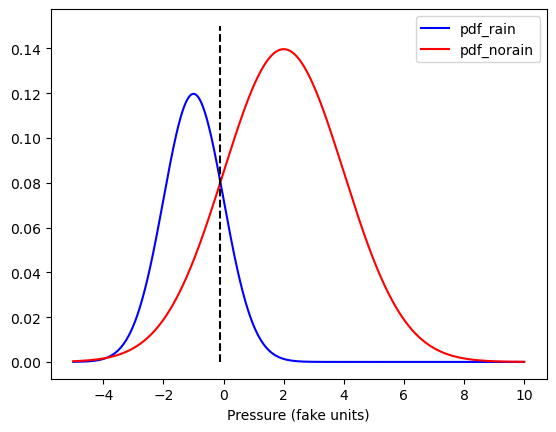

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# figure inspired from https://www.astroml.org/book_figures/chapter9/fig_bayes_DB.html
def gaussian(x, mu, sigma):
  return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-((x - mu)/sigma)**2/2)

pressure = np.linspace(-5,10,1000) # pressure distribution (fake units)

p_rain = 0.3  # probability that it is raining
p_norain = 1 - p_rain # probability that it is not raining

pdf_rain   = p_rain*gaussian(pressure,-1,1)
pdf_norain = p_norain*gaussian(pressure,2,2)

pressure_bayes = pressure[np.where(pdf_rain > pdf_norain)][-1]

plt.plot(pressure,pdf_rain, 'b', label='pdf_rain')
plt.plot(pressure,pdf_norain, 'r', label='pdf_norain')
plt.plot([pressure_bayes, pressure_bayes], [0,0.15], 'k--')

plt.xlabel('Pressure (fake units)')
plt.legend()

In this figure, we see that when $Pressure < 0$, it is more likely to be raining and when $Pressure > 0$, it is more likely to be a sunny day. The threshold $Pressure = 0$ is called the **Bayes decision boundary**. It correspond to the pressure $p_0$ such that

\begin{equation}
P(r = 1|pressure = p_0) = P(r = 0|pressure = p_0)\, ,
\end{equation}
with $r$ a variable that is 1 when it is raining and 0 otherwise.

The Bayes classifier proposes to assign to the category $r=1$ all days for which $Pressure < p_0$ and to $r=0$ all the other days.

Note however that all days for which $Pressure < p_0$ are not necessarily rainy days we will make errors if we adopt this classification because as we have seen in the figure above, there are sunny days for which $Pressure < p_0$. We can measure the error by computing

\begin{equation}
L = \sum_{i} \delta(r_i \ne \hat r_i)\, ,
\end{equation}
where the sum is over all our observations, $\hat r_i$ is our predicted value of the rain, and $\delta(r_i \ne \hat r_i)$ is a function that equals 1 for misclassified data and 0 otherwise.

**The Bayes classifier is the classifier that minimizes the error $L$.**

... However, to compute the Bayes classifier, we need to know the *true* pdf of the occurrence of our categories (which we never know in practice...).

### Context: Bayes theorem

Sometimes, the direct conditional probability $P(C=k|X=\mathbf x^{\rm obs})$ is hard to evaluate (sparse data). However, we can use Bayes' theorem that states that

\begin{equation}
P(C=k|X=\mathbf x^{\rm obs}) = \frac{f_{X|C}(\mathbf x^{\rm obs} | k) P(C=k)}{f_X(\mathbf x^{\rm obs})}\, ,
\end{equation}

where 

- $f_{X|C}(\mathbf x^{\rm obs} | k)$ is called the *likelihood* of observing event $C$ given the observation $\mathbf x^{\rm obs}$
- $P(C=k)$ is the *prior* observation of observing event $C$
- $f_X(\mathbf x^{\rm obs})$ is just a normalization factor also called the marginal probability

#### Likelihood

In general $f_{X|C}(\mathbf x | k)$ is a probability (density) of observing $\mathbf x$ given $C=k$. In this context where $k$ is fixed, it is indeed a probability because $f_{X|C}$ is only a function of $\mathbf x$ and satisfies the two conditions cited above.


However, if we now consider the case $\mathbf x$ is given and $c$ is variable, then $f_{X|C}(\mathbf x | k)$ becomes a function of $k$ and is no longer a probability: it is a *likelihood*

> ***Question***
> - Make sure you understand the concept of likelihood if your observation of the atmosphere is that the temperature is 3 degrees and you want to know the likelihood of the *rain* event. Does $f_{X|C}(3~degC| rain)$ and  $f_{X|C}(3~degC| no\_rain)$ sum up to 1?

#### Prior

The prior $P(C=k)$, as its name indicates, is the probability of observing $C=k$ without any other information.

> ***Question***
> - Can you write the marginal probability $f_X(\mathbf x)$ as a function of $f_{X|C}(\mathbf x | k)$ and $P(C=k)$ to show that it is indeed a renormalization factor in the Bayes theorem

## Generative models

The field of *Generative models* consists in estimating the *probability* 

\begin{equation}
f_{X|C}(\mathbf x | k)
\end{equation}

for all $k$ and all $\mathbf x$. Once we have a model for this probability, we can use Bayes' theorem to infer the quantity of interest, namely 

\begin{equation}
P(C=k|X=\mathbf x^{\rm obs})\, .
\end{equation}

We recall that depending on the context, $f_{X|C}(\mathbf x | k)$ is either a likelihood (variable $\mathbf x$, fixed $k$) or a probability (fixed $\mathbf x$, variable $k$)

### Linear discriminant analysis

#### Case with 1 predictor (p=1)

To illustrate the idea of linear discriminant analysis, we will first consider the case where there is only 1 predictor, that is $\mathbf x$ is a scalar (that we thus write $x$). The number of classes is $K$

One proposition for $f_{X|C}(x | k)$ is to suppose that for each class, the data is distributed according to the *Gaussian distribution*

\begin{equation}
\hat f_{X|C}(x | k) = \frac{1}{\sqrt{2\pi}\sigma} \exp \left(  -\frac{1}{2} \frac{(x-\mu_k)^2}{\sigma^2}\right)\, ,
\end{equation}

that is $\mathcal N (\mu_k,\sigma^2)$ where the mean $\mu_k$ is specific to each class, but the covariance is common to all classes.

To estimate the parameters $\mu_k$ and $\sigma$, suppose that we have $N_k$ observations in each class (with a total of $N$ observations). We gather all the observations that belong to a class $k$ to compute the mean and variance of the class. 

\begin{equation}
\hat \mu_k = \frac{1}{N_k} \sum_{i\in C_k} x_i
\end{equation}

\begin{equation}
\hat \sigma_k = \frac{1}{N_k-1} \sum_{i\in C_k} (x_i - \hat \mu_k)^2
\end{equation}

where the notation $i\in C_k$ says that the sum spans only the observations that belong to the class $k$


The weighted average of the variances is

\begin{equation}
\hat \sigma = \frac{1}{N-K} \sum_{k} (N_k-1) \hat \sigma_k 
\end{equation}

So *on average* each observation belongs to a distribution of mean $\hat \mu_k$ and variance $\hat \sigma$.

We can use these values in our expression of the Gaussian distribution above in order to fully characterize $f_{X|C}(x | k)$

Remember that we are interested in $P(C=k|X=\mathbf x^{\rm obs})$, and in order to use Bayes' Theorem, we still need to estimate the prior $P(C=k)$.

> ***Question***
> - Given the sample that we have used so far, what is $\hat P_k$ the most obvious estimate of $P(C=k)$, the probability that an observation falls into the class $k$?



We can now gather all bits and pieces to construct the final probability of observation $x$ of belonging to class $k$

\begin{equation}
\hat P(C=k|X=x ) = \frac{\hat P_k \hat f_{X|C}(x | k) }{\sum_i  \hat P_i \hat f_{X|C}(x | i)}
\end{equation}

For a given observation, we can assign the class $k$ that has the largest probability. Since the log is a monotonic function, we can also compare the log of the probability and get the same result for our classification. If we do that, we can then assign an observation to the class for which 

\begin{equation}
\delta_k (x) = x \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log(P_k)
\end{equation}

is the highest. This quantity is called the discriminant function.

> ***Question (optional)***
> - Derive the equation of the linear discriminant function.

We get that the discriminant is a *linear* function of $x$. It is linear because each pdf $f_{X|C}(x | k)$ has the same variance for all classes. This causes the non linear term to cancel in the expression of the discriminant. 

The advantage of LDA is that there are few parameters to adjust (method not prone to overfitting). And the obvious drawback is that each class do not necessarily obey the same distribution. If we relax that approximation, we get a decision boundary which is no longer linear: it is called *Quadratic discriminant analysis* (QDA).

#### Generalization of LDA to  $p>1$

All the formalism holds in higher dimensions: the likelihood in a $p$-dimensional space is

\begin{equation}
\hat f_{X|C}(\mathbf x | k) = \frac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}} \exp \left(  -\frac{1}{2} (\mathbf x-\mathbf \mu_k)^\top \Sigma^{-1}(\mathbf x-\mathbf \mu_k)\right)\, ,
\end{equation}

where $\Sigma$ is the covariance matrix and $|\Sigma|^{1/2}$ is the square root of the determinant of that matrix.

For $p>1$ the discriminant function is

\begin{equation}
\delta_k (x) = \mathbf x^\top \Sigma^{-1} \mathbf \mu_k - \frac{1}{2}\mathbf \mu_k^\top \Sigma^{-1} \mathbf \mu_k  + \log(P_k)
\end{equation}

Note that the expression is very similar to the 1d case, except that we now handle vectors and matrices instead of scalars.

<div class="alert alert-block alert-info">
    <b>LDA summary</b>
    
- Use Bayes to inverse the problem (Generative model)
- Decision boundary is linear

</div>

### Naive Bayes

The Naive Bayes classifier is a popular method that share many similarities with LDA. Like LDA, it is a generative model for which we try to predict $f(\mathbf x |k)$.

In order to estimate that probability, the naive Bayes methods *naively* assume that all variables are independent so

\begin{equation}
f(\mathbf x |k) = f(x_1 |k)f(x_2 |k)...f(x_p |k)
\end{equation}

and also

\begin{equation}
f(\mathbf x) = f(x_1)f(x_2)
\end{equation}

which we will need for the normalization in Bayes' theorem.

This hypothesis of independent variables is a very strong hypothesis so you should not use this method when you know this is not true. Classification of images for instance will often fail because nearby pixels are correlated.



This method is still attractive because is is much simpler to estimate a 1-dimensional pdf  rather than a $p$-dimensional pdf. This method will also be useful when the number of features $p$ is bigger than the number of observations $N$.

To estimate these pdf, we can use any method like Gaussian kernels, histograms, etc...

## References

- [James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An introduction to statistical learning* (Vol. 112, p. 18). New York: springer.](https://www.statlearning.com/)

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>